In [207]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [208]:

data = pd.read_csv('./weatherHistory.csv')  # ajusta según nombre real
X= data['Wind Speed (km/h)']
y=data['Temperature (C)']

m = y.size
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [209]:
print(X)

0        14.1197
1        14.2646
2         3.9284
3        14.1036
4        11.0446
          ...   
96448    10.9963
96449    10.0947
96450     8.9838
96451    10.5294
96452     5.8765
Name: Wind Speed (km/h), Length: 96453, dtype: float64


In [210]:
print(y)

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64


In [211]:
def plotData(x, y):

    fig = pyplot.figure()  

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('temperatura')
    pyplot.xlabel('velocidad del viento')

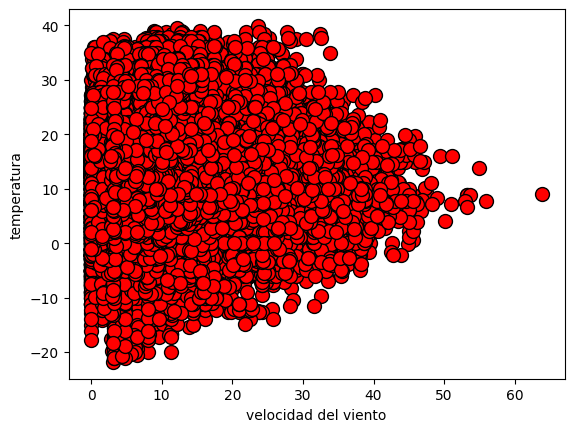

In [212]:
plotData(X, y)

In [213]:
X = np.stack([np.ones(m), X], axis=1)

print(X)

[[ 1.     14.1197]
 [ 1.     14.2646]
 [ 1.      3.9284]
 ...
 [ 1.      8.9838]
 [ 1.     10.5294]
 [ 1.      5.8765]]


In [214]:
def calcularCosto(X, y, theta):
   
    m = y.size 
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [215]:
def gradientDescent(X, y, theta, alpha, num_iters):
        
    m = y.shape[0]

    theta = theta.copy()

    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history


In [216]:

theta = np.zeros(2)


iterations = 5000
alpha = 0.00001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(J_history)

Theta encontrada por descenso gradiente: 0.2201, 0.7737
[np.float64(116.64072981791033), np.float64(116.47206553726897), np.float64(116.3039582802716), np.float64(116.13640620605597), np.float64(115.96940747984351), np.float64(115.80296027291939), np.float64(115.6370627626121), np.float64(115.47171313227408), np.float64(115.30690957126116), np.float64(115.14265027491324), np.float64(114.97893344453418), np.float64(114.81575728737226), np.float64(114.65312001660051), np.float64(114.49101985129704), np.float64(114.32945501642563), np.float64(114.16842374281626), np.float64(114.0079242671457), np.float64(113.8479548319181), np.float64(113.68851368544595), np.float64(113.52959908183071), np.float64(113.37120928094372), np.float64(113.2133425484071), np.float64(113.0559971555748), np.float64(112.89917137951372), np.float64(112.74286350298466), np.float64(112.58707181442361), np.float64(112.43179460792295), np.float64(112.27703018321284), np.float64(112.12277684564256), np.float64(111.969032

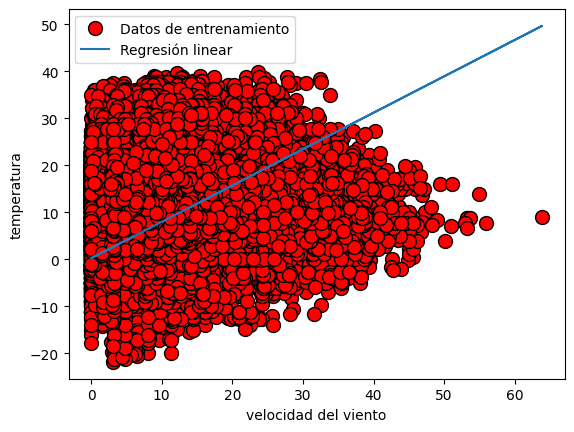

In [217]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear'])

In [218]:
# Función para predecir Balance según Income
def predict_balance(income):
    return np.dot([1, income], theta)  # [1, x] · [theta0, theta1]

# Predecir Balance para clientes con ingresos de 35,000 y 70,000
predict1 = predict_balance(35)
predict2 = predict_balance(14)

print('Para Wind Speed = 35 km/h → Temperature ≈ {:.2f} °C'.format(predict1))
print('Para Wind Speed = 14 km/h → Temperature ≈ {:.2f} °C'.format(predict2))


Para Wind Speed = 35 km/h → Temperature ≈ 27.30 °C
Para Wind Speed = 14 km/h → Temperature ≈ 11.05 °C


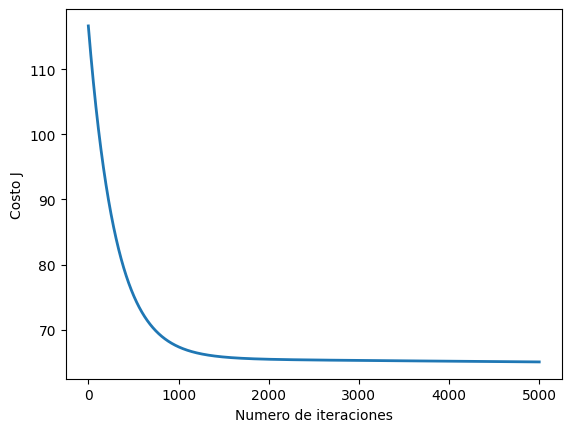

In [219]:



# Grafica la convergencia del costo
ax = pyplot.subplot()
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass